In [1]:
using DataFrames
using Distributions
using LinearAlgebra
dot2(x) = dot(x, x)
using Plots
default(fmt=:png)
using RCall

In [2]:
data = [
    0.67 0.83
    0.66 1.34
    0.68 1.27
    0.68 1.53
    0.71 1.72
    0.71 1.54
    0.71 1.39
    0.72 1.23
    0.73 1.58
    0.7325 1.58
    0.74 1.60
    0.755 1.55
    0.755 1.63
    0.76 1.65
    0.765 1.5
    0.77 1.56
    0.77 1.4
    0.772 1.44
    0.773 1.74
    0.78 1.79
    0.7825 1.71
    0.7875 1.36
    0.7975 1.45
    0.795 1.52
    0.805 1.69
    0.82 1.65
    0.835 1.605
    0.8475 1.48
    0.865 1.36
    0.89 1.72
]
@show size(data)
X, Y = eachcol(data)
df = DataFrame(X = X, Y = Y);

size(data) = (30, 2)


In [3]:
function plot_ols(X, Y;
        xlim=(0.6, 1.0), ylim=(0.6, 2.0),
        xtick=0.6:0.1:1.0, ytick=0.6:0.2:2.0,
        size=(1000, 450),
        α = 0.05,
        xguide = "gender gap index",
        yguide = "total fertility rate",
        plotci = true,
        legend = :bottomright
    )
    n = length(X)
    A = [ones(n) X]
    β̂ = A \ Y
    Ŷ = A * β̂
    s = √(dot2(Y - Ŷ)/(n - 2))
    c = quantile(TDist(n - 2), 1 - α/2)
    f(x) = evalpoly(x, β̂)
    g(a, b) = √([a, b]' * (A'A \ [a, b]))
    R = cor(X, Y)
    
    pval_β₁(β₁) = 2ccdf(TDist(n - 2), abs(β̂[2] - β₁)/(s*g(0, 1)))
    pval = pval_β₁(0)
    ci = [β̂[2] - c*s*g(0, 1), β̂[2] + c*s*g(0, 1)]
    ci′ = [β̂[2] - c*abs(β̂[2])/√(n-2)*√((1 - R^2)/R^2), β̂[2] + c*abs(β̂[2])/√(n-2)*√((1 - R^2)/R^2)]
    @show pval
    @show ci
    @show ci′
    println()
    
    println("y = $(round(β̂[2], digits=2)) x + $(round(β̂[1], digits=2))")
    println("R² = ", round(R^2; digits=2))
    println("P-value of \"β₁ = 0\" = ", round(pval; digits=4))
    println("$(100(1-α))% CI of β₁ = $(round.(ci; digits=4))")
    
    P = scatter(X, Y; label="", xlim, ylim, xtick, ytick)
    plot!(f; label="regression line", c=2)
    plotci && plot!(x -> f(x) + c*s*g(1, x); label="$(100(1-α))% CI", ls=:dot, c=3)
    plotci && plot!(x -> f(x) - c*s*g(1, x); label="", c=3)
    plotci && plot!(x -> ci[begin]*(x - mean(X)) + mean(Y); label="max β₁", ls=:dash, c=4)
    plotci && plot!(x -> ci[end]*(x - mean(X)) + mean(Y); label="min β₁", ls=:dashdot, c=5)
    plot!(; xguide, yguide, legend)
    
    Q = plot(pval_β₁, β̂[2] - 4s*g(0, 1), β̂[2] + 4s*g(0, 1); label="")
    vline!([β̂[2]]; label="point estimate of β₁", ls=:dash, c=2)
    vline!([0.0]; label="", c=:black, lw=0.5)
    plotci && plot!(ci, fill(α, 2); label="$(100(1-α))% CI", lw=2, c=3)
    plot!(ytick=0:0.05:1, xguide="β₁", yguide="P-value")
    
    plot(P, Q; size)
    plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)
end

plot_ols (generic function with 1 method)

* https://twitter.com/nhk_news/status/1648537152706191362
* https://www3.nhk.or.jp/news/special/news_seminar/jiji/jiji133/

<img src="IMG_9568.jpg" width="640">

* https://www.kantei.go.jp/jp/content/000116413.pdf

<img src="IMG_9579.jpg" width="640">

<img src="IMG_9579-1.jpg" width="640">

pval = 0.022663207605639057
ci = [0.2129756784822372, 2.6121676242433525]
ci′ = [0.21297567848225407, 2.6121676242433356]

y = 1.41 x + 0.44
R² = 0.17
P-value of "β₁ = 0" = 0.0227
95.0% CI of β₁ = [0.213, 2.6122]


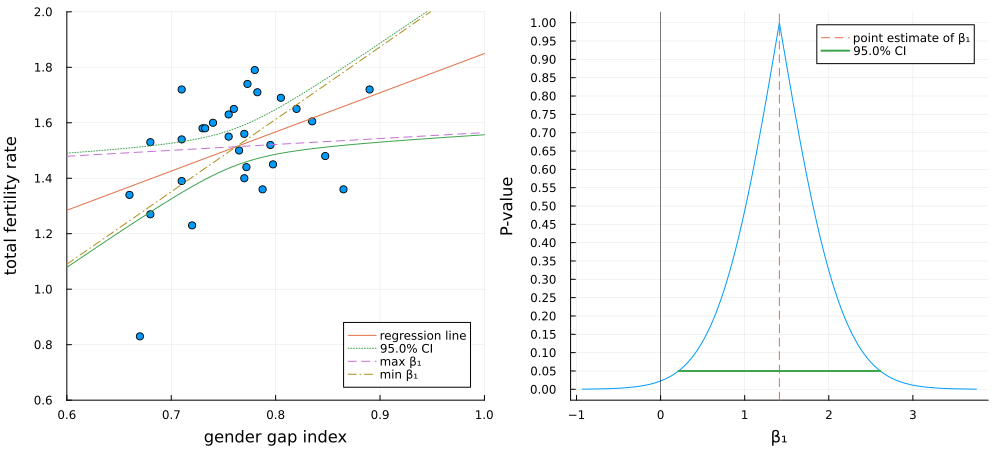

In [4]:
plot_ols(X, Y)

pval = 0.022663207605639057
ci = [-0.03224430620124985, 2.8573876089268397]
ci′ = [-0.032244306201229866, 2.8573876089268193]

y = 1.41 x + 0.44
R² = 0.17
P-value of "β₁ = 0" = 0.0227
98.0% CI of β₁ = [-0.0322, 2.8574]


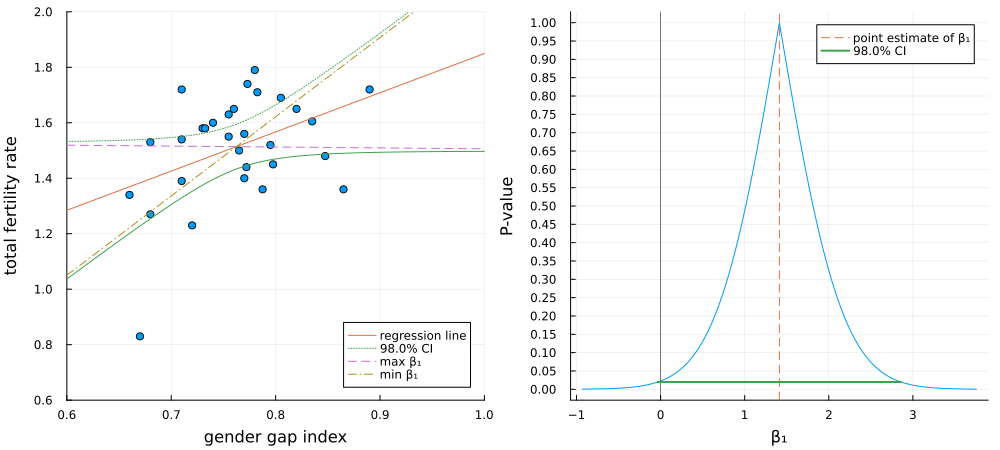

In [5]:
plot_ols(X, Y; α = 0.02)

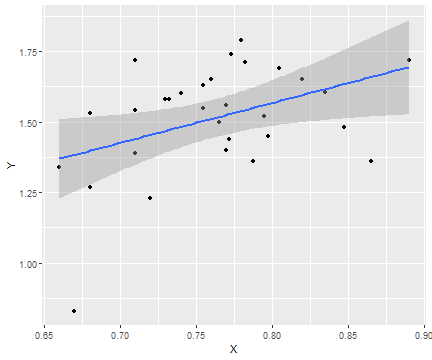

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [6]:
@rput df
R"""
library(ggplot2)
ggplot(df, aes(x = X, y = Y)) + 
  geom_point() +
  stat_smooth(method = lm)
"""

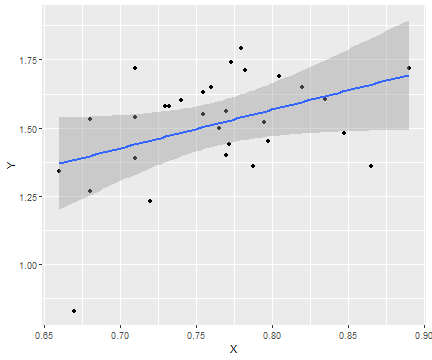

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [7]:
@rput df
R"""
library(ggplot2)
ggplot(df, aes(x = X, y = Y)) + 
  geom_point() +
  geom_smooth(method = lm, level=0.98)
"""

pval = 0.1184249372779967
ci = [-0.2150076457114457, 1.7945213231275523]
ci′ = [-0.21500764571145103, 1.7945213231275576]

y = 0.79 x + 0.93
R² = 0.09
P-value of "β₁ = 0" = 0.1184
95.0% CI of β₁ = [-0.215, 1.7945]


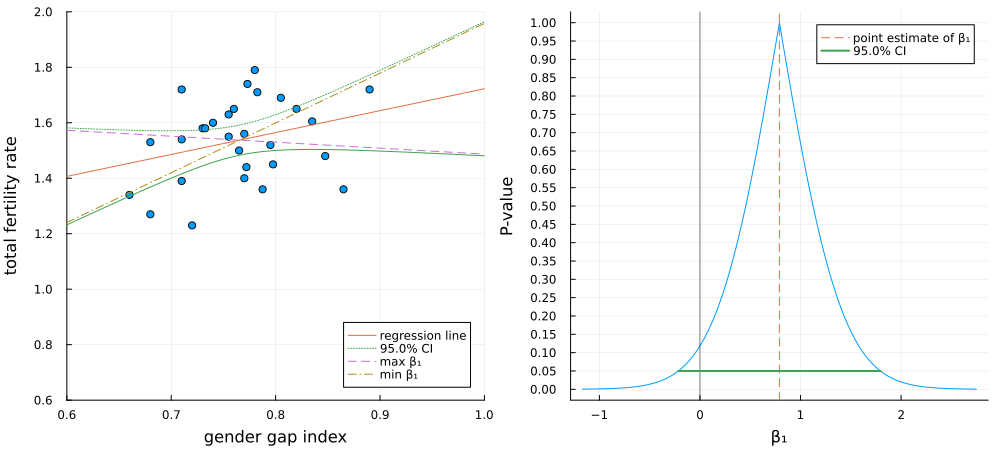

In [8]:
plot_ols(X[begin+1:end], Y[begin+1:end])

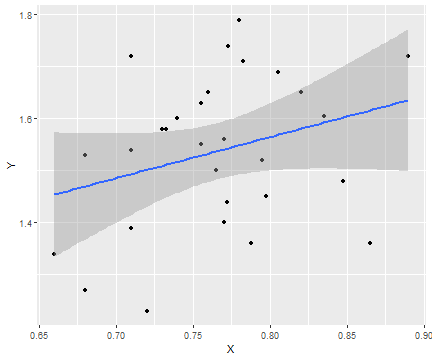

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [9]:
df1 = DataFrame(X = X[begin+1:end], Y = Y[begin+1:end])
@rput df1
R"""
library(ggplot2)
ggplot(df1, aes(x = X, y = Y)) + 
  geom_point() +
  geom_smooth(method = lm)
"""

pval = 0.2609375462470625
ci = [-0.49821261116664106, 1.7616409123606291]
ci′ = [-0.4982126111666486, 1.7616409123606367]

y = 0.63 x + 1.05
R² = 0.05
P-value of "β₁ = 0" = 0.2609
95.0% CI of β₁ = [-0.4982, 1.7616]


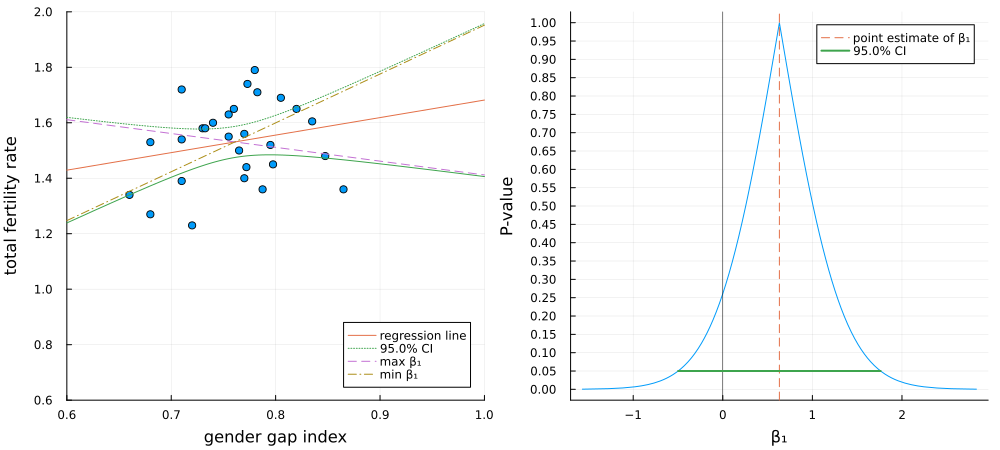

In [10]:
plot_ols(X[begin+1:end-1], Y[begin+1:end-1])

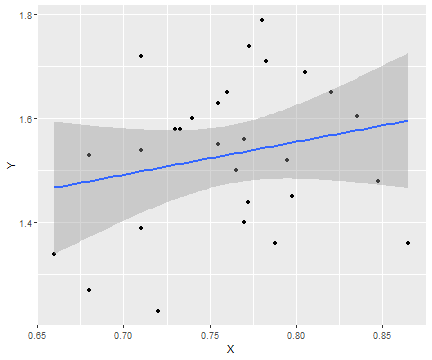

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [11]:
df2 = DataFrame(X = X[begin+1:end-1], Y = Y[begin+1:end-1])
@rput df2
R"""
library(ggplot2)
ggplot(df2, aes(x = X, y = Y)) + 
  geom_point() +
  geom_smooth(method = lm)
"""

pval = 0.022663207605639057
ci = [0.2129756784822372, 2.6121676242433525]
ci′ = [0.21297567848225407, 2.6121676242433356]

y = 1.41 x + 0.44
R² = 0.17
P-value of "β₁ = 0" = 0.0227
95.0% CI of β₁ = [0.213, 2.6122]


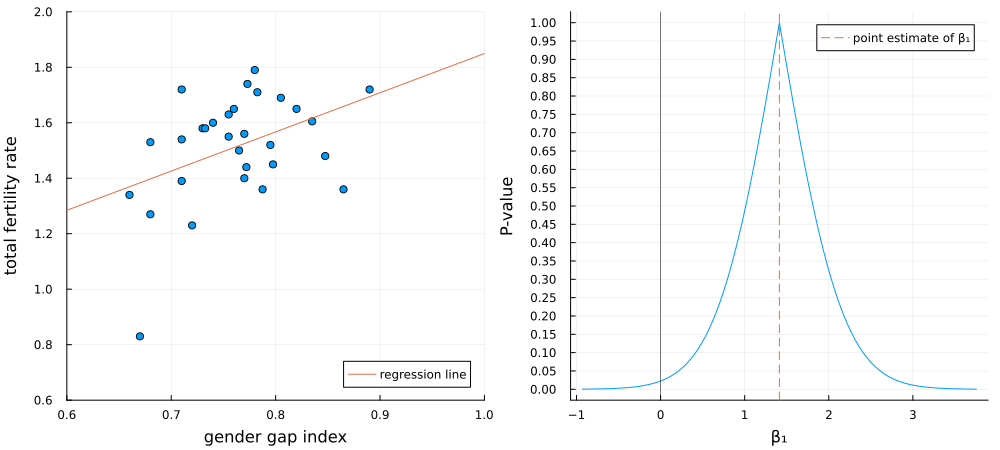

In [12]:
plot_ols(X, Y; plotci=false)

pval = 0.1184249372779967
ci = [-0.2150076457114457, 1.7945213231275523]
ci′ = [-0.21500764571145103, 1.7945213231275576]

y = 0.79 x + 0.93
R² = 0.09
P-value of "β₁ = 0" = 0.1184
95.0% CI of β₁ = [-0.215, 1.7945]


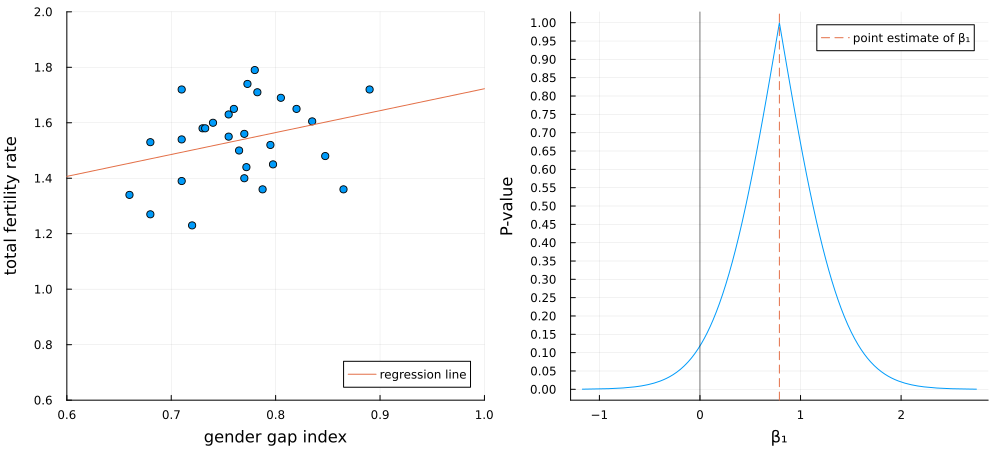

In [13]:
plot_ols(X[begin+1:end], Y[begin+1:end]; plotci=false)